In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# Load data
df = pd.read_csv("../data/raw/telco_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,data
0,7590,Female,0,Yes,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575,Male,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668,Male,0,No,2,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795,Male,0,No,45,No,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237,Female,0,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Basic inspection
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5 non-null      int64  
 1   gender            5 non-null      object 
 2   SeniorCitizen     5 non-null      int64  
 3   Partner           5 non-null      object 
 4   tenure            5 non-null      int64  
 5   PhoneService      5 non-null      object 
 6   MultipleLines     5 non-null      object 
 7   InternetService   5 non-null      object 
 8   OnlineSecurity    5 non-null      object 
 9   OnlineBackup      5 non-null      object 
 10  DeviceProtection  5 non-null      object 
 11  TechSupport       5 non-null      object 
 12  StreamingTV       5 non-null      object 
 13  StreamingMovies   5 non-null      object 
 14  Contract          5 non-null      object 
 15  PaperlessBilling  5 non-null      object 
 16  PaymentMethod     5 non-null      object 
 17  M

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.000000,5.0,5.000000,5.000000,5.000000
mean,6773.000000,0.0,16.800000,50.730000,803.980000
std,2171.376177,0.0,21.087911,15.445574,969.824311
min,3668.000000,0.0,1.000000,29.850000,29.850000
25%,5575.000000,0.0,2.000000,42.300000,108.150000
50%,7590.000000,0.0,2.000000,53.850000,151.650000
75%,7795.000000,0.0,34.000000,56.950000,1840.750000
max,9237.000000,0.0,45.000000,70.700000,1889.500000


In [8]:
# Missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
data                0
dtype: int64

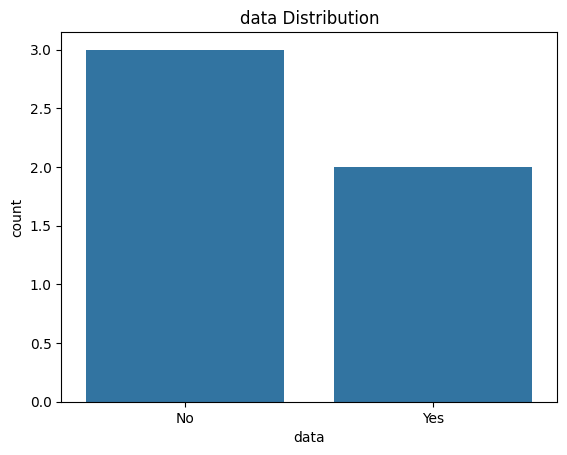

In [9]:
# Target distribution
df["data"].value_counts()
df["data"].value_counts(normalize=True)
sns.countplot(data=df, x="data")
plt.title("data Distribution")
plt.show()


In [ ]:
# Key visual insights
sns.countplot(data=df, x="Contract", hue="data")
plt.xticks(rotation=45)
plt.title("data by Contract Type")
plt.show()
sns.boxplot(data=df, x="data", y="MonthlyCharges")
plt.title("Monthly Charges by data")
plt.show()

# Exploratory Data Analysis (EDA)

## Objective
Explore the Telco Customer data dataset to understand data quality, feature distributions,
and patterns related to customer data.
## Key Observations

- The target variable (`data`) shows moderate class imbalance.
- Customers on month-to-month contracts are more likely to data.
- Higher monthly charges are associated with increased data.
- Several features are categorical and will require encoding.
- `TotalCharges` requires type conversion and missing value handling.
